---
# 9. Regression models exercise
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

Exercise_1 : return_X_yを用いて説明変数 Xと目的変数 yを生成し、さらにそれらndarrayを列方向に結合してください（Xy）

In [4]:
X, y = load_boston(return_X_y=True)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>X, y = load_boston(return_X_y=True)</code>
</details>

In [5]:
Xy = np.concatenate([X, y.reshape(-1, 1)], axis=1)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>Xy = np.concatenate([X, y.reshape(-1, 1)], axis=1)</code>
</details>

In [6]:
# 実行して表示。この場合はリストではなくndarrayになっている
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# 実行して表示
df = pd.DataFrame(Xy, columns=boston['feature_names'].tolist() + ['target'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Exercise_2 : bostonの詳細情報（description）を表示して確認してください

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>print(boston.DESCR)</code>
</details>

In [9]:
# 実行して表示
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Exercise_3 : 下記の関数を完成させ各特徴量のプロットを確認してください(#の部分にすべて同じものが入ります)

In [10]:
def plot_data(feature):
    fig, axes = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)
    sns.histplot(data=df, x=feature, ax=axes[0], multiple='dodge')   #
    axes[0].legend([], frameon=False)
    sns.boxplot(data=df, x=feature, ax=axes[1], width=0.5)   #
    axes[1].set_xticklabels([])
    sns.scatterplot(data=df, x=feature, y=y, ax=axes[2], alpha=0.7)   #
    axes[2].legend([], frameon=False)
    plt.suptitle(feature)
    plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>data=df, x=feature</code>
</details>

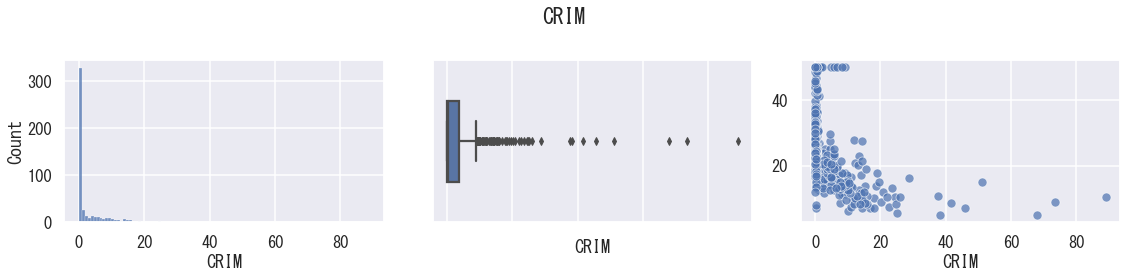

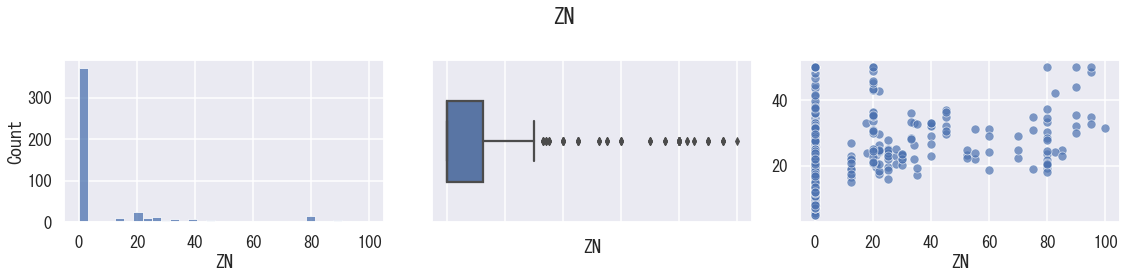

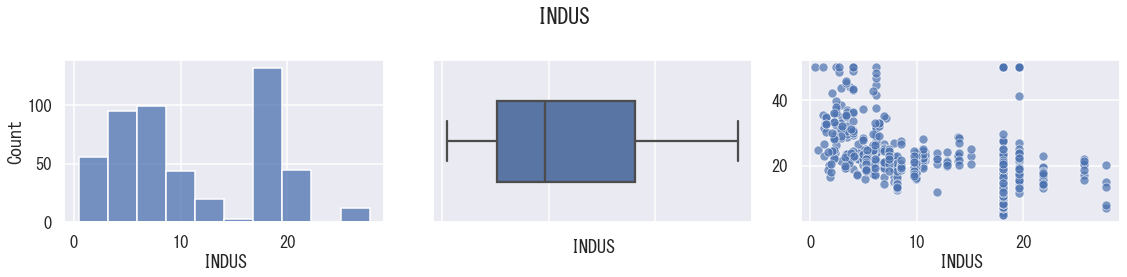

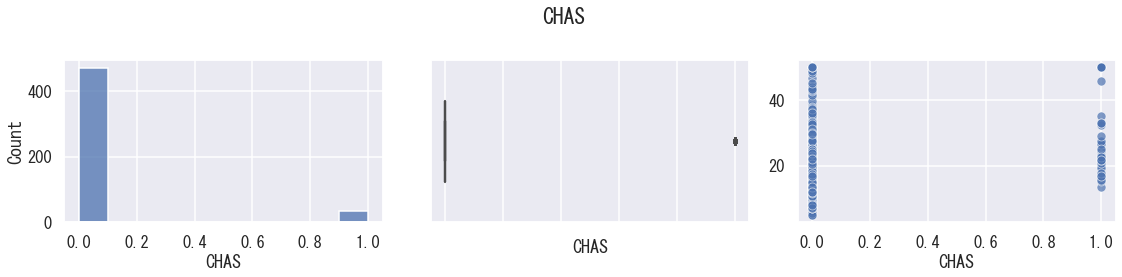

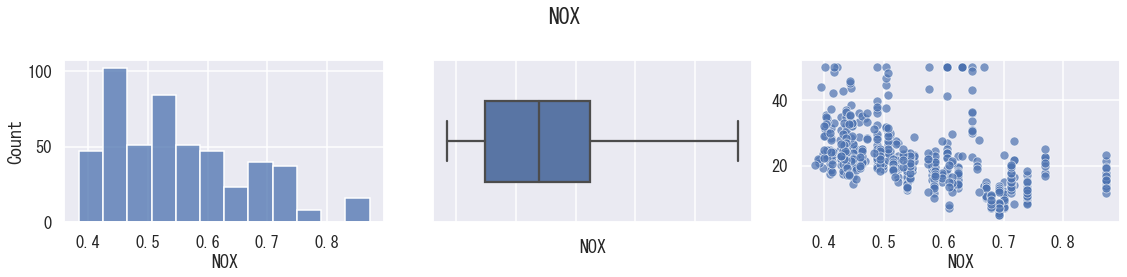

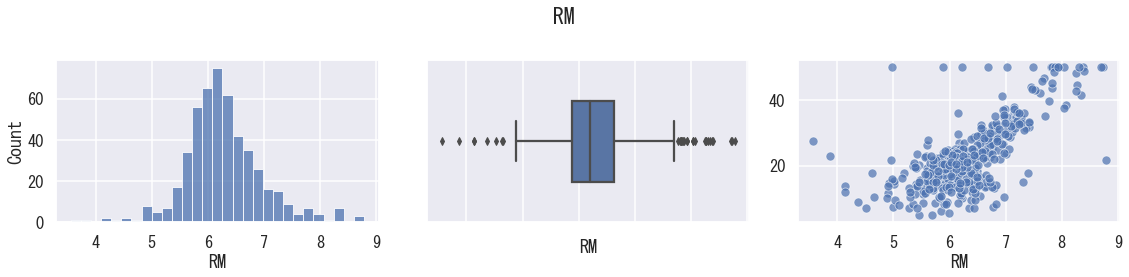

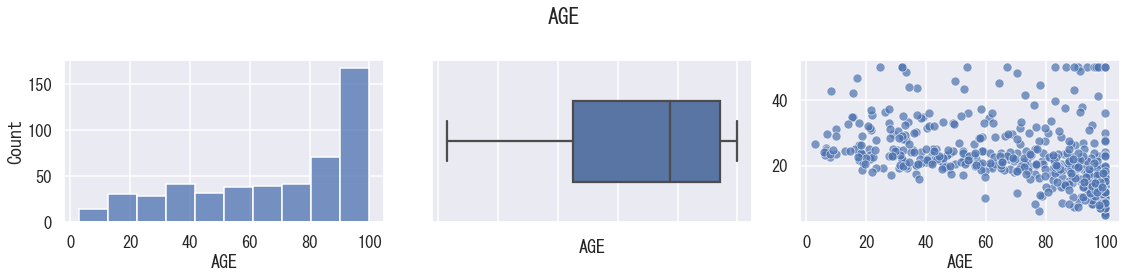

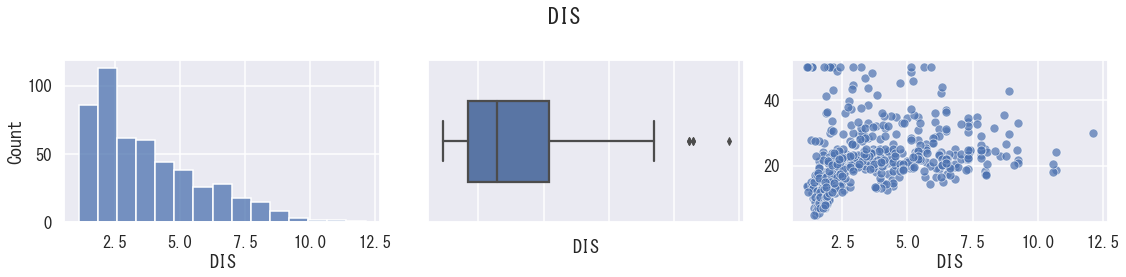

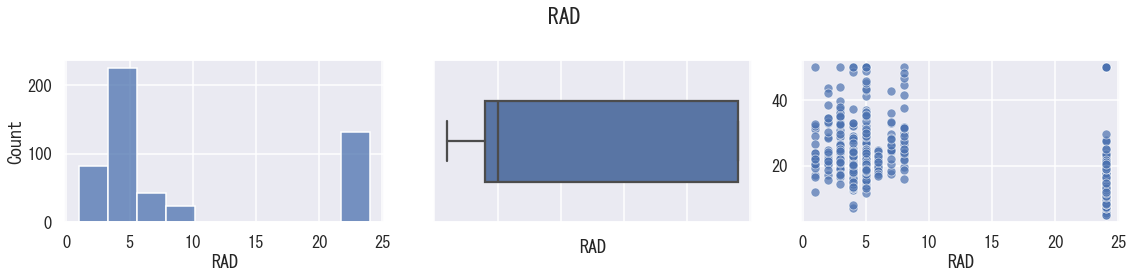

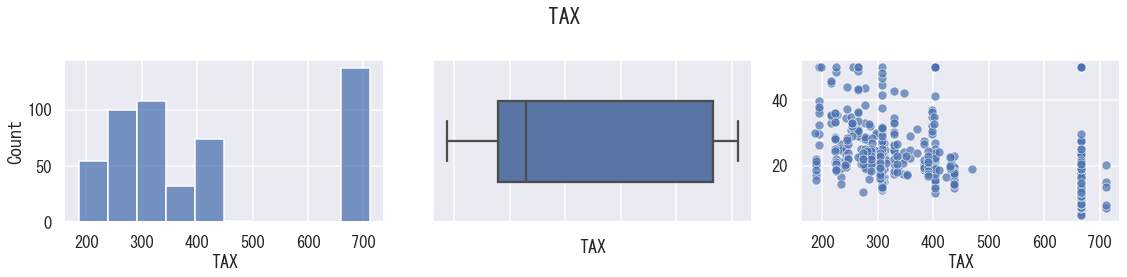

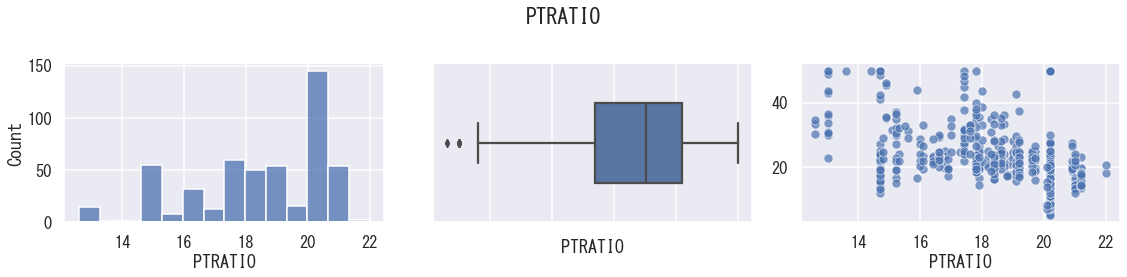

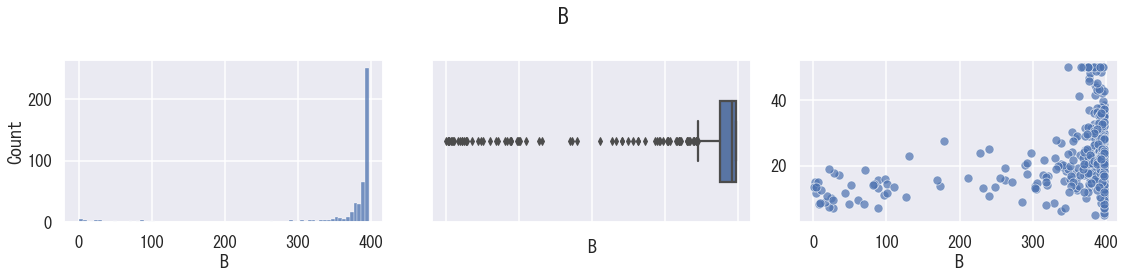

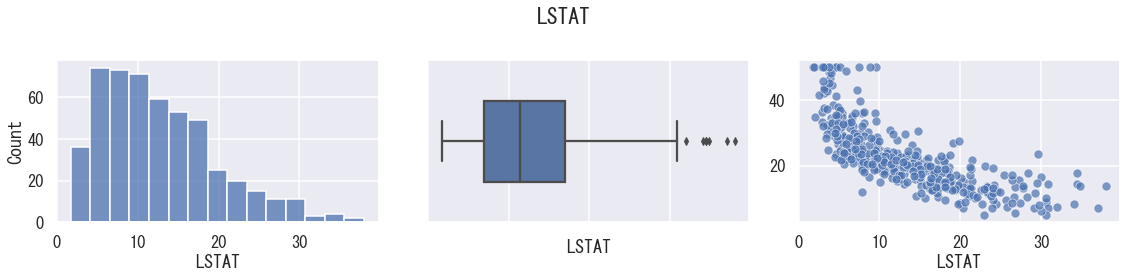

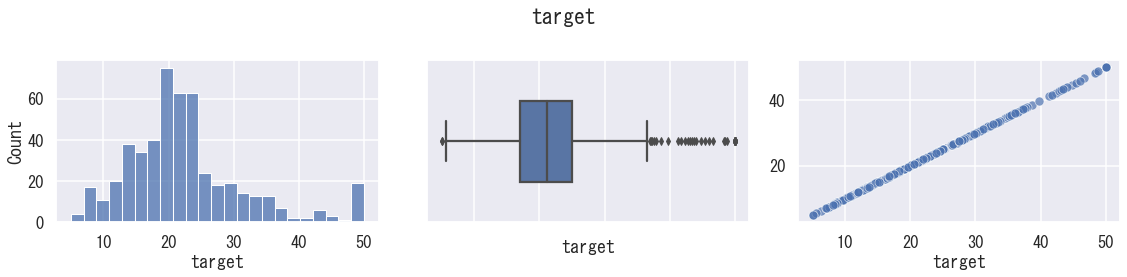

In [11]:
# 実行して表示
for feature in df.columns:
    plot_data(feature)

Exercise_4 : 外れ値に影響を受けにくいRobustScalerで説明変数をスケーリングを実行してください

In [12]:
# 実行
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [13]:
X_scaled = scaler.fit_transform(X)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>X_scaled = scaler.fit_transform(X)</code>
</details>

In [14]:
# 実行して表示
X_scaled[:3]

array([[-0.06959315,  1.44      , -0.57164988,  0.        ,  0.        ,
         0.49661247, -0.25076453,  0.28577673, -0.2       , -0.0878553 ,
        -1.33928571,  0.26190191, -0.63768116],
       [-0.06375455,  0.        , -0.20294345,  0.        , -0.39428571,
         0.28794038,  0.0285423 ,  0.56978872, -0.15      , -0.22739018,
        -0.44642857,  0.26190191, -0.22188906],
       [-0.06376011,  0.        , -0.20294345,  0.        , -0.39428571,
         1.32317073, -0.3343527 ,  0.56978872, -0.15      , -0.22739018,
        -0.44642857,  0.06667466, -0.73263368]])

Exercise_5 : 本セクションで使った3つの回帰分析モデルをインポートし、モデルのインスタンスを作成してください

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>from sklearn.linear_model import LinearRegression</code><br>
    <code>from sklearn.ensemble import RandomForestRegressor</code><br>
    <code>from sklearn.neighbors import KNeighborsRegressor</code>
</details>

In [35]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor()
kn_model = KNeighborsRegressor()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>lr_model = LinearRegression()</code><br>
    <code>rf_model = RandomForestRegressor()</code><br>
    <code>kn_model = KNeighborsRegressor()</code>
</details>

In [36]:
# 実行
models = [lr_model, rf_model, kn_model]

In [18]:
# 実行
from sklearn.model_selection import train_test_split

Exercise_6 :train_test_splitを用いてX_scaled、yからトレインデータ、テストデータを作成して下さい。その際の分割を7：3、ランダムステートを17に指定してください

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=17)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=17)</code>
</details>

Exercise_7 : lr_modelを使い、上記のデータセットのX_testに対する予測を行ってください。

In [20]:
lr_model.fit(X_train, y_train)

LinearRegression()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>lr_model.fit(X_train, y_train)</code>
</details>

In [21]:
pred = lr_model.predict(X_test)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>pred = lr_model.predict(X_test)</code>
</details>

In [22]:
# 実行して表示
pred[:3]

array([30.30255143, 27.40582625, 20.13587321])

In [23]:
# 実行して表示。ｙの最小、最大からその範囲を確認しておく
y.min(), y.max()

(5.0, 50.0)

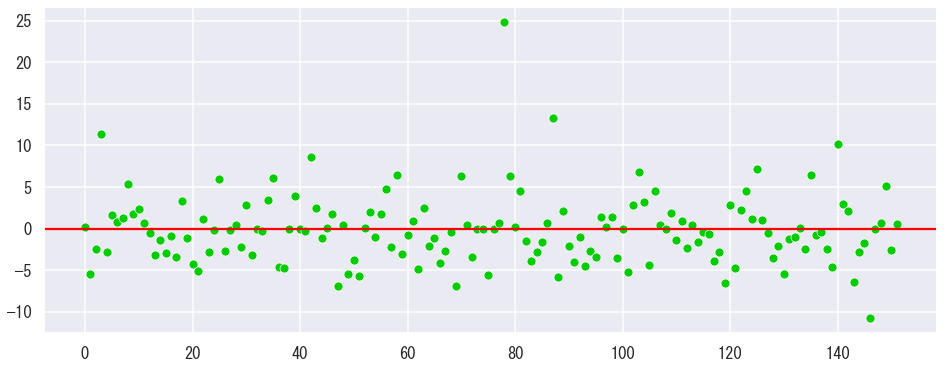

In [24]:
# 実行して表示
plt.figure(figsize=(16, 6))
sns.scatterplot(data=y_test - pred,  color='#0c0')
plt.axhline(0, color='#f00')
plt.show()

In [25]:
# 実行
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

Exercise_8 : 下記のスコアを算出してください

In [26]:
r2 = np.round(r2_score(y_test, pred), 4)
mae = np.round(mean_absolute_error(y_test, pred), 4)
mse = np.round(mean_squared_error(y_test, pred), 4)
mape = np.round(mean_absolute_percentage_error(y_test, pred), 4)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>r2_score(y_test, pred)</code><br>
    <code>mean_absolute_error(y_test, pred)</code><br>
    <code>mean_squared_error(y_test, pred)</code><br>
    <code>mean_absolute_percentage_error(y_test, pred)</code>
</details>

In [27]:
# 実行して表示
print(f'r2 : {r2}, mae : {mae}, mse : {mse}, mape : {mape}')

r2 : 0.7621, mae : 2.9666, mse : 18.0417, mape : 0.1405


Exercise_9 : lr_modelの係数、切片を表示して下さい

In [28]:
lr_model.coef_

array([-0.41396875,  0.69732651,  0.87207216,  3.4806903 , -3.00172282,
        2.45329665, -0.00764937, -4.55177229,  6.17084205, -5.06456577,
       -2.6364584 ,  0.1694119 , -5.73323974])

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>lr_model.coef_</code>
</details>

In [29]:
lr_model.intercept_

22.969348122105608

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>lr_model.intercept_</code>
</details>

In [30]:
# 実行
from sklearn.model_selection import KFold, cross_val_score

Exercise_10 : KFoldの分割数を5、シャッフル、、ランダムステートを17として下記の k を作成してください

In [31]:
k = KFold(5, shuffle=True, random_state=17)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>k = KFold(5, shuffle=True, random_state=17)</code>
</details>

Exercise_11 : k, X, yを用いて下記のforループを完成させ、スコアの平均値をプリントしてください

In [37]:
for model in models:
    scores = cross_val_score(model, X, y, cv=k)  #
    print(f'{model} : {scores.mean()}')   # 
    print('\n')

LinearRegression() : 0.7138417499261732


RandomForestRegressor() : 0.8559727612967457


KNeighborsRegressor() : 0.48844806671939034




<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>scores = cross_val_score(model, X, y, cv=k) </code><br>
    <code>scores.mean()</code>
</details>

Exercise_12 : k, X_scaled, yを用いて下記のforループを完成させ、スコアの平均値をプリントしてください。スケール前のスコアとの違いを確認してください

In [38]:
for model in models:
    scores = cross_val_score(model, X_scaled, y, cv=k)   #
    print(f'{model} : {scores.mean()}')
    print('\n')

LinearRegression() : 0.713841749926174


RandomForestRegressor() : 0.8541277096401295


KNeighborsRegressor() : 0.7447680150362632




<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>scores = cross_val_score(model, X_scaled, y, cv=k)</code><br>
</details>

In [39]:
# 実行
from sklearn.model_selection import GridSearchCV

In [40]:
# 実行
params = {
    'n_estimators':[140, 160],
    'max_depth':[18, 22],
    'max_features':[0.6, 0.9],
}

Exercise_13 : rf_modelに対して、上記の params と k を用いてグリッドサーチを実行してください(fitを行う)

In [41]:
grid = GridSearchCV(rf_model, param_grid=params, cv=k)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>grid = GridSearchCV(rf_model, param_grid=params, cv=k)</code><br>
</details>

In [42]:
# X_scaledとyを使う
grid.fit(X_scaled, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=17, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [18, 22], 'max_features': [0.6, 0.9],
                         'n_estimators': [140, 160]})

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>grid.fit(X_scaled, y)</code><br>
</details>

Exercise_14 : 上記の結果を取得しデータフレームにしてください

In [43]:
result = pd.DataFrame(grid.cv_results_)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>pd.DataFrame(grid.cv_results_)</code><br>
</details>

In [44]:
# 実行して表示
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.322312,0.021224,0.013571,0.001106,18,0.6,140,"{'max_depth': 18, 'max_features': 0.6, 'n_esti...",0.859177,0.871191,0.824524,0.918909,0.903279,0.875416,0.033285,1
1,0.383061,0.058981,0.016407,0.003044,18,0.6,160,"{'max_depth': 18, 'max_features': 0.6, 'n_esti...",0.848790,0.863192,0.794618,0.918208,0.900056,0.864973,0.043081,5
2,0.474933,0.029594,0.018335,0.003932,18,0.9,140,"{'max_depth': 18, 'max_features': 0.9, 'n_esti...",0.872658,0.871025,0.769490,0.920070,0.888625,0.864373,0.050608,6
3,0.380541,0.019144,0.014072,0.001360,18,0.9,160,"{'max_depth': 18, 'max_features': 0.9, 'n_esti...",0.875176,0.879711,0.774115,0.915044,0.883687,0.865547,0.047816,4
4,0.263824,0.016629,0.011545,0.000996,22,0.6,140,"{'max_depth': 22, 'max_features': 0.6, 'n_esti...",0.851862,0.855144,0.796836,0.919172,0.909766,0.866556,0.044368,3
5,0.320568,0.035566,0.014167,0.000748,22,0.6,160,"{'max_depth': 22, 'max_features': 0.6, 'n_esti...",0.856226,0.857792,0.805393,0.918622,0.908514,0.869309,0.040885,2
6,0.337185,0.004281,0.012503,0.001019,22,0.9,140,"{'max_depth': 22, 'max_features': 0.9, 'n_esti...",0.865837,0.883849,0.761185,0.918198,0.885825,0.862979,0.053622,8
7,0.374245,0.010635,0.013678,0.001319,22,0.9,160,"{'max_depth': 22, 'max_features': 0.9, 'n_esti...",0.865682,0.879143,0.765798,0.916242,0.889069,0.863187,0.051439,7


Exercise_15 : 最良のパラメータを表示してください

In [45]:
grid.best_params_

{'max_depth': 18, 'max_features': 0.6, 'n_estimators': 140}

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>grid.best_params_</code><br>
</details>

## 以上